## Introduction of RAG Concepts
Amazon Bedrock Knowledge Bases allows you to integrate proprietary information into your generative-AI applications. Using the Retrieval Augment Generation (RAG) technique , a knowledge base searches your data to find the most useful information and then uses it to answer natural language questions.

With knowledge bases, you can build applications that are enriched by the context that is received from querying a knowledge base. It enables a faster time to market by abstracting from the heavy lifting of building pipelines and providing you an out-of-the-box RAG solution to reduce the build time for your application. Adding a knowledge base also increases cost-effectiveness by removing the need to continually train your model to be able to leverage your private data.

## Module Walkthrough

In this module, we include 4 labs to introduce the building blocks of your RAG workflows with Knowledge Base for Amazon Bedrock:

Creating Knowledge Base with multiple data sources: This lab provides sample code for building an empty OpenSearch Serverless (OSS) index,Amazon Bedrock Knowledge Bases and ingest documents into the index from various data sources (S3, Confluence, Sharepoint, Salesforce, and Web).
Managed RAG using RetrieveAndGenerate API: This lab demonstrates how to build managed retrieval augmented generation (RAG) using RetrieveAndGenerate API from Amazon Bedrock Knowledge Bases with custom prompt and number of retrieval configurations.
Building Q&A application with customized RAG using Retrieve API: If you want to customize your RAG workflow, you can use the retrieve API provided by Amazon Bedrock Knowledge Bases. You can perform different types of searches such as semantic or hybrid search over your vector store. This notebook, provides sample code for hybrid search using Claude 3 models as well as demonstrates LangChain integration with Amazon Bedrock Knowledge Bases.
Building and Evaluating Q&A application with RAGAS framework: If you are interested in evaluating your RAG application, try this sample code for evaluating the response using RAGAS as assessment framework.
Document level API: With Document Level API (DLA), customers can now efficiently and cost-effectively ingest, update, or delete data directly from Amazon Bedrock Knowledge Bases using a single API call, without the need to perform a full sync with the data source periodically or after every change.

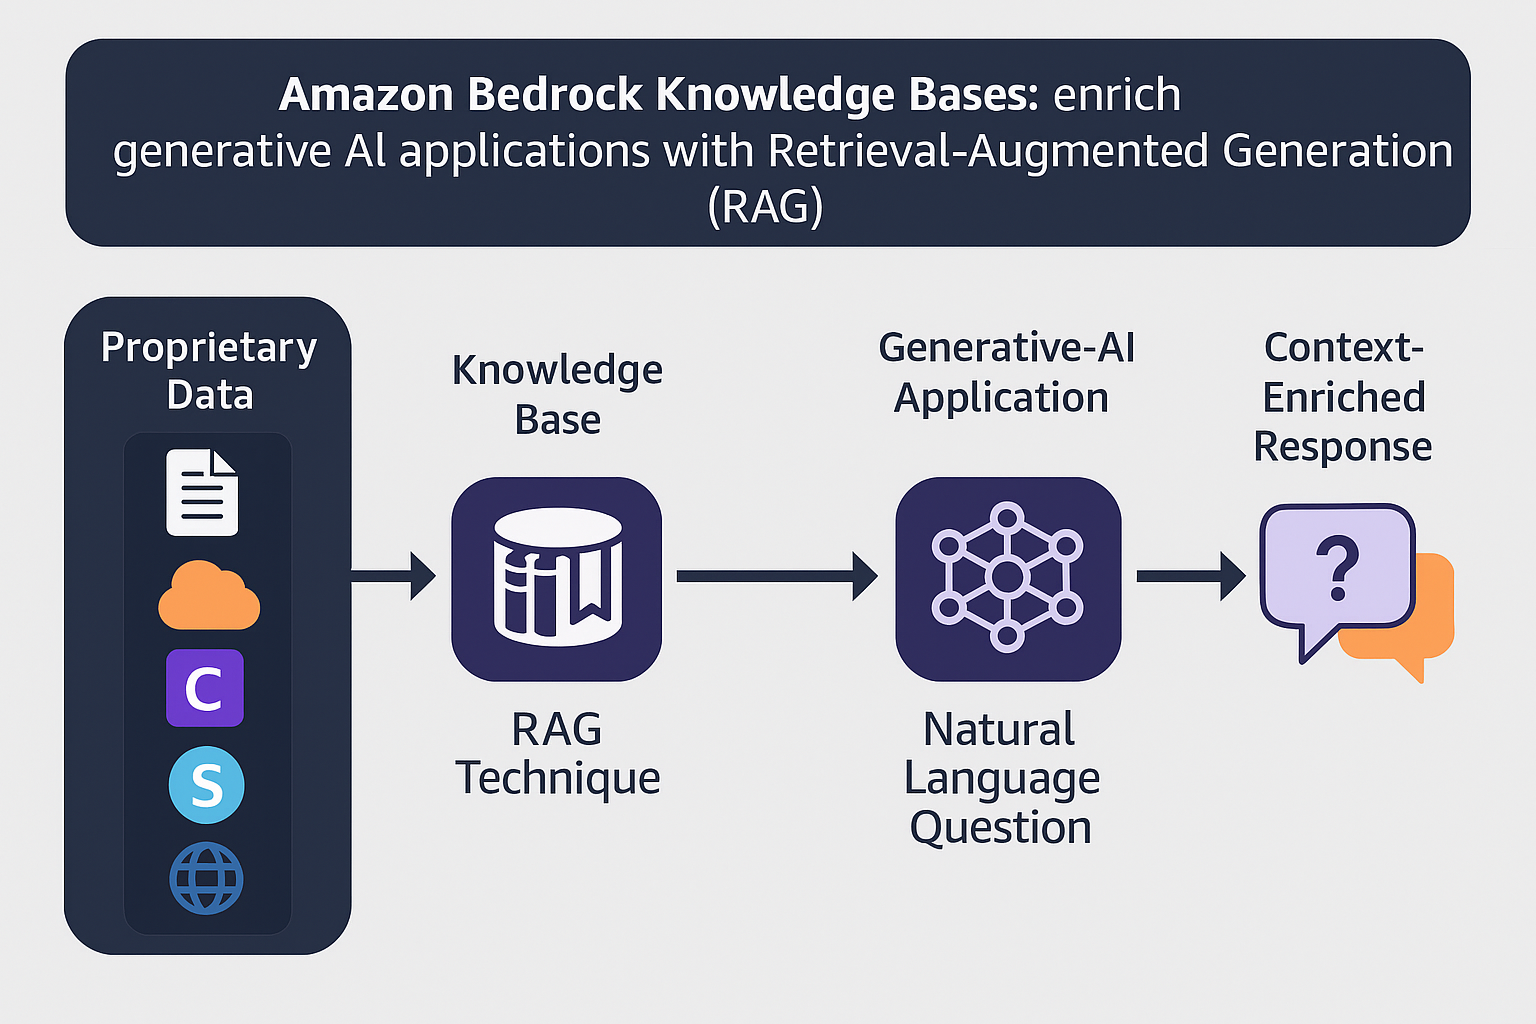


## 🔷 Overall Working Flow (Conceptual RAG Pipeline with AWS Bedrock Knowledge Base)
┌────────────────────────────┐
 │  Your Private Data Sources │
 │ S3 | Confluence | SharePoint│
 │ Salesforce | Web | etc.    │
 └────────────┬───────────────┘
              │  (ingest + embed)
              ▼
 ┌────────────────────────────┐
 │ Amazon Bedrock Knowledge   │
 │   Base + Vector Store      │
 │   (OpenSearch Serverless)  │
 └────────────┬───────────────┘
              │  (retrieve relevant chunks)
              ▼
 ┌────────────────────────────┐
 │  Retrieval-Augmented        │
 │  Generation (RAG) Engine    │
 │  Combine prompt + retrieved │
 │  context                    │
 └────────────┬───────────────┘
              │  (send to LLM)
              ▼
 ┌────────────────────────────┐
 │ Gen-AI Model (Claude, Llama│
 │  Titan, etc.)              │
 └────────────┬───────────────┘
              │  (produce final output)
              ▼
 ┌────────────────────────────┐
 │ End-User Application        │
 │ Q&A, Chatbot, Agent, App    │
 └────────────────────────────┘


## 🔷 Modules in the AWS Knowledge Base Lab – Flow Representation

 ┌─────────────────────────────────────────────────┐
 | 1. Create Knowledge Base & Ingest Data          |
 |  - Build OSS Index                               |
 |  - Add data sources (S3, Confluence, Web, etc.)   |
 └──────────────────────────┬───────────────────────┘
                            ▼
 ┌─────────────────────────────────────────────────┐
 | 2. Managed RAG using RetrieveAndGenerate API     |
 |  - Bedrock automatically retrieves & generates   |
 |  - Custom prompts + retrieval configs supported  |
 └──────────────────────────┬───────────────────────┘
                            ▼
 ┌─────────────────────────────────────────────────┐
 | 3. Customized RAG using Retrieve API             |
 |  - Direct retrieval (semantic / hybrid search)   |
 |  - LangChain and Claude 3 integration examples   |
 └──────────────────────────┬───────────────────────┘
                            ▼
 ┌─────────────────────────────────────────────────┐
 | 4. Evaluation with RAGAS Framework               |
 |  - Accuracy, relevance, hallucination tests      |
 |  - Score and improve your RAG pipeline           |
 └──────────────────────────┬───────────────────────┘
                            ▼
 ┌─────────────────────────────────────────────────┐
 |  Document Level API (DLA)                        |
 |  - Add / update / delete docs directly           |
 |  - No need full source resync                    |
 └─────────────────────────────────────────────────┘


## 🔷 Full Pipeline View Including DLA


 Data Sources ─────────▶ Knowledge Base ─────────▶ DLA API (update docs)
      │                        │
      │                        ▼
      └────► Initial ingest & vectorization
                                 │
                                 ▼
                          Retrieve API / RetrieveAndGenerate API
                                 │
                                 ▼
                        Gen-AI Model (Claude / Titan / Llama)
                                 │
                                 ▼
                          Application Output (Q&A / Chatbot)


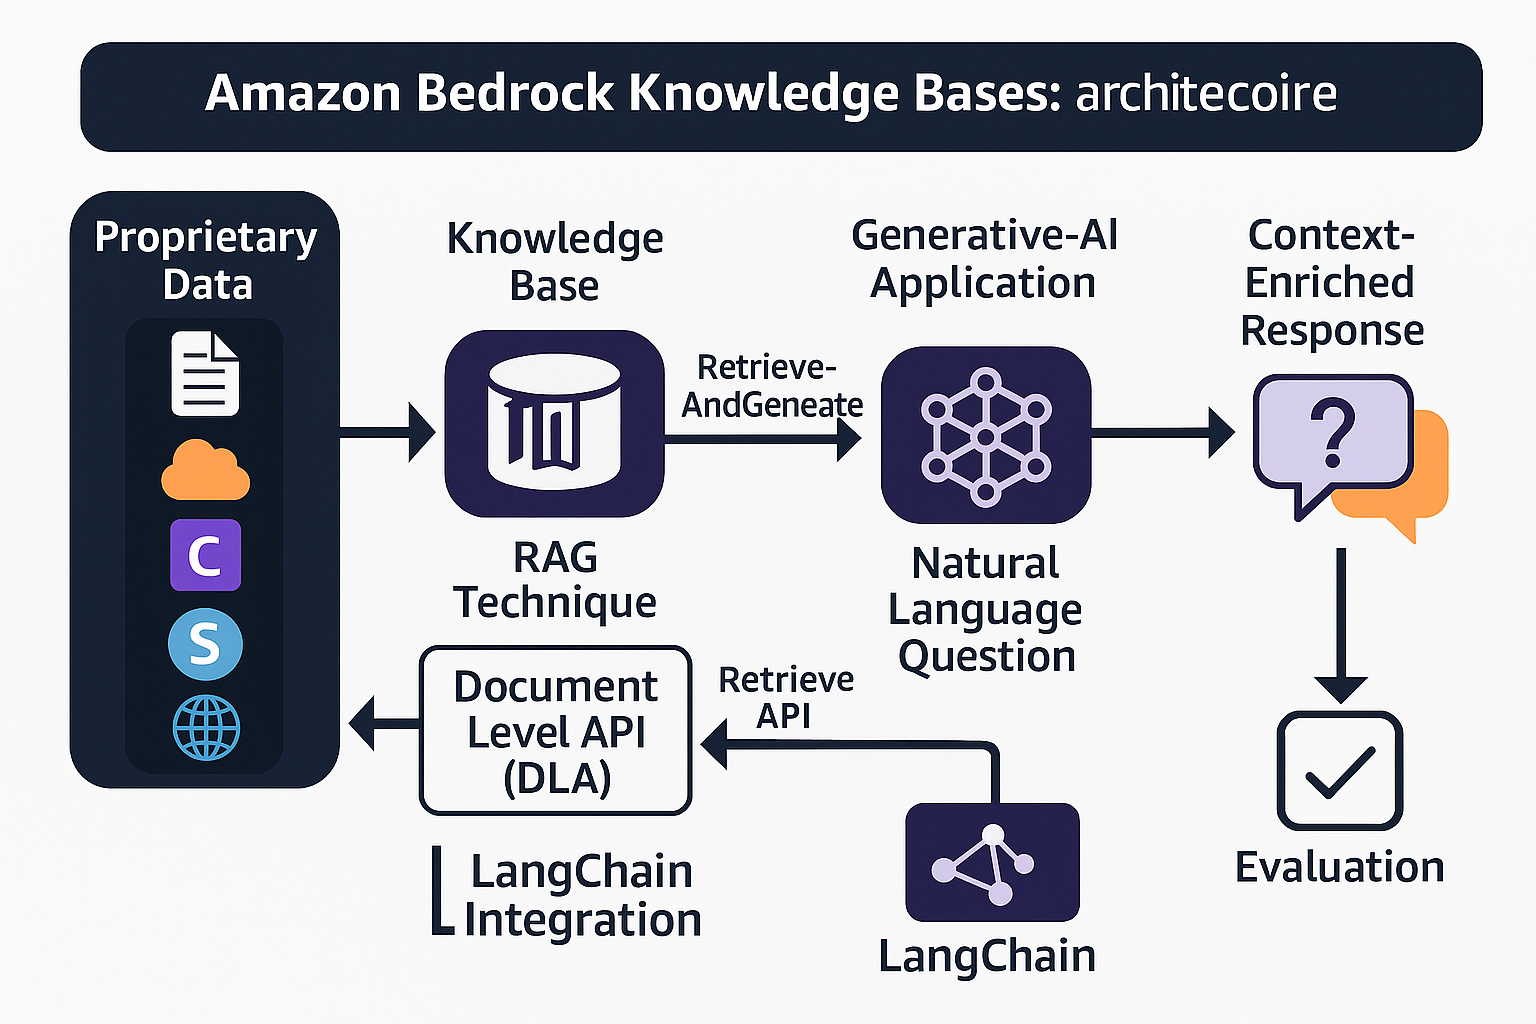

Diagram legend (what each block represents)
1) Data sources & ingestion

Sources: Amazon S3, Confluence, SharePoint, Salesforce, and Web. Bedrock Knowledge Bases manage ingestion, chunking, embeddings, and indexing (can auto‑provision OpenSearch Serverless). [docs.aws.amazon.com]
Document Level API (DLA): Use IngestKnowledgeBaseDocuments / GetKnowledgeBaseDocuments to ingest, update, or delete documents directly without full sync. [docs.aws.amazon.com], [docs.aws.amazon.com]
Multimodal ingestion (optional): Bedrock Data Automation (BDA) / Nova embeddings to parse PDFs/images/audio/video into searchable text and metadata. [docs.aws.amazon.com], [docs.aws.amazon.com]

2) Vector stores & storage

Default/Managed: Amazon OpenSearch Serverless (Bedrock can create/secure collections for you). Hybrid or semantic search selectable via overrideSearchType. [docs.aws.amazon.com], [docs.aws.amazon.com]
Alternatives: OpenSearch Managed clusters, Pinecone, Redis Enterprise Cloud, S3 Vectors, Aurora, Neptune Analytics (GraphRAG), MongoDB Atlas—choose per workload/cost. [docs.aws.amazon.com], [dataforcee.us], [hackernoon.com]

3) Retrieval & generation APIs

Customized RAG: Retrieve API returns chunks/images + metadata, supports filters, reranking, hybrid/semantic search. Great for building your own orchestration with LangChain. [docs.aws.amazon.com], [docs.aws.amazon.com]
Managed RAG: RetrieveAndGenerate (and streaming variant) performs retrieval + LLM invocation + citations, supports custom prompt templates and reranking. [docs.aws.amazon.com], [docs.aws.amazon.com], [docs.aws.amazon.com]
Structured data: GenerateQuery converts natural language into store‑specific queries (e.g., SQL) before retrieval. [docs.aws.amazon.com]
Hybrid search: Combine semantic + keyword for best relevance; enable via KB query config. [aws.amazon.com], [docs.aws.amazon.com]
Guardrails note: Guardrails apply to user input and LLM output—not to retrieved references. [docs.aws.amazon.com], [docs.aws.amazon.com]

4) LangChain integration

Use AmazonKnowledgeBasesRetriever from langchain-aws or JS @langchain/aws to call Bedrock KB via Retrieve API; plug into RetrievalQA with Claude or other Bedrock‑hosted models. Supports LangSmith tracing. [docs.langchain.com], [js.lang.chat]
Dynamic metadata filtering patterns are available (AND/OR filters) to tailor results per user/session. [aws.amazon.com], [github.com]

5) Evaluation (RAGAS)

Evaluate answers using RAGAS metrics: faithfulness, answer relevancy, context recall/precision, etc. AWS recipe shows KB + LangChain + Claude + RAGAS integration. [docs.ragas.io], [docs.ragas.io], [aws-sample....github.io]

6) Security & governance

IAM/KMS encryption across ingestion jobs, vector stores, and data at rest; TLS in transit. [docs.aws.amazon.com], [docs.aws.amazon.com]
Private access to OpenSearch Serverless via VPC endpoints (PrivateLink) and network/data access policies. [docs.aws.amazon.com], [docs.aws.amazon.com]
Org architecture patterns with VPC Lattice, centralized service network, and restricted model access. [aws.amazon.com], [aws.amazon.com]


Reference architecture (step‑by‑step)


Ingest & index

Upload source docs to S3 (or connect Confluence/SharePoint/Salesforce/Web) and create a Knowledge Base with chosen embedding model & vector store. Enable hybrid search if using OpenSearch Serverless. [docs.aws.amazon.com], [docs.aws.amazon.com]
For rapid updates, call DLA (IngestKnowledgeBaseDocuments) to add/update/remove specific docs without full sync. [docs.aws.amazon.com]



Secure the pipeline

Attach KMS keys to ingestion jobs and vector stores; configure data/network access policies and PrivateLink for OpenSearch. [docs.aws.amazon.com], [docs.aws.amazon.com], [docs.aws.amazon.com]



Build the retrieval layer

Option A (customized): Use LangChain AmazonKnowledgeBasesRetriever → call Retrieve with filters, reranking, HYBRID/SEMANTIC search. Compose the prompt and call Claude (e.g., claude-3-haiku) via Bedrock runtime. [docs.langchain.com], [docs.aws.amazon.com], [docs.aws.amazon.com]
Option B (managed): Use RetrieveAndGenerate (or streaming) with a prompt template, guardrails, and citation output for quick start. [docs.aws.amazon.com], [docs.aws.amazon.com]



Observability & evaluation

Log source chunks and scores; enable LangSmith tracing in LangChain. [docs.langchain.com]
Run RAGAS offline eval on test sets (faithfulness, relevancy, recall/precision, etc.), then feed scores into CI to gate releases. [docs.ragas.io], [docs.ragas.io]



Feedback & iteration

Use reranking models and metadata filters to improve retrieval; continuously refine chunking/embeddings. [docs.aws.amazon.com], [aws.amazon.com]